In [1]:
# import dependencies
from path import Path
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
from matplotlib import pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import r2_score


%matplotlib inline

C:\Users\muzzn\anaconda3\envs\PythonData\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\muzzn\anaconda3\envs\PythonData\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\muzzn\anaconda3\envs\PythonData\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\muzzn\anaconda3\envs\PythonData\lib\site-packages

In [2]:
# load in the files
file = Path("../Resources/merged_covid.csv")
file1= Path("../Resources/government_regulation.csv")
file2= Path("../Resources/covid_stats.csv")
file3= Path("../Resources/merged_covid_stats_population.csv")

# read the files
df= pd.read_csv(file)
df_gov=pd.read_csv(file1)
df_st=pd.read_csv(file2)
df_pop=pd.read_csv(file3)


In [3]:
# Check merged_covid.csv
print(df.dtypes)
print(df.shape)

# Display df
df.head()

date_updated                        object
iso_code                            object
continent                           object
location                            object
new_cases                          float64
new_deaths                         float64
new_tests                          float64
total_cases_updated                float64
total_deaths_updated               float64
total_tests_updated                float64
StringencyIndex_updated            float64
StringencyLegacyIndex_updated      float64
GovernmentResponseIndex_updated    float64
ContainmentHealthIndex_updated     float64
EconomicSupportIndex_updated       float64
dtype: object
(48591, 15)


,date_updated,iso_code,continent,location,new_cases,new_deaths,new_tests,total_cases_updated,total_deaths_updated,total_tests_updated,StringencyIndex_updated,StringencyLegacyIndex_updated,GovernmentResponseIndex_updated,ContainmentHealthIndex_updated,EconomicSupportIndex_updated
0,2020-03-13,ABW,North America,Aruba,2.0,0.0,0.0,2.0,0.0,0.0,0.00,0.00,2.56,3.03,0.0
1,2020-03-19,ABW,North America,Aruba,0.0,0.0,0.0,2.0,0.0,0.0,33.33,42.86,29.49,34.85,0.0
2,2020-03-20,ABW,North America,Aruba,2.0,0.0,0.0,4.0,0.0,0.0,33.33,42.86,29.49,34.85,0.0
3,2020-03-21,ABW,North America,Aruba,0.0,0.0,0.0,4.0,0.0,0.0,44.44,60.71,37.18,43.94,0.0
4,2020-03-22,ABW,North America,Aruba,0.0,0.0,0.0,4.0,0.0,0.0,44.44,60.71,37.18,43.94,0.0


In [4]:
# Check df_gov
print(df_gov.shape)
print(df_gov.dtypes)

# Display df
df_gov.head()



(43676, 8)
Date_updated                        object
CountryName                         object
CountryCode                         object
StringencyIndex_updated            float64
StringencyLegacyIndex_updated      float64
GovernmentResponseIndex_updated    float64
ContainmentHealthIndex_updated     float64
EconomicSupportIndex_updated       float64
dtype: object


,Date_updated,CountryName,CountryCode,StringencyIndex_updated,StringencyLegacyIndex_updated,GovernmentResponseIndex_updated,ContainmentHealthIndex_updated,EconomicSupportIndex_updated
0,2020-01-01,Aruba,ABW,0.0,0.0,0.0,0.0,0.0
1,2020-01-02,Aruba,ABW,0.0,0.0,0.0,0.0,0.0
2,2020-01-03,Aruba,ABW,0.0,0.0,0.0,0.0,0.0
3,2020-01-04,Aruba,ABW,0.0,0.0,0.0,0.0,0.0
4,2020-01-05,Aruba,ABW,0.0,0.0,0.0,0.0,0.0


In [5]:
# Check df_gov
print(df_st.shape)
print(df_st.dtypes)

# Display df
df_st.head()

(34927, 10)
date_updated             object
iso_code                 object
continent                object
location                 object
new_cases               float64
new_deaths              float64
new_tests               float64
total_cases_updated     float64
total_deaths_updated    float64
total_tests_updated     float64
dtype: object


,date_updated,iso_code,continent,location,new_cases,new_deaths,new_tests,total_cases_updated,total_deaths_updated,total_tests_updated
0,2020-03-13,ABW,North America,Aruba,2.0,0.0,0.0,2.0,0.0,0.0
1,2020-03-19,ABW,North America,Aruba,0.0,0.0,0.0,2.0,0.0,0.0
2,2020-03-20,ABW,North America,Aruba,2.0,0.0,0.0,4.0,0.0,0.0
3,2020-03-21,ABW,North America,Aruba,0.0,0.0,0.0,4.0,0.0,0.0
4,2020-03-22,ABW,North America,Aruba,0.0,0.0,0.0,4.0,0.0,0.0


In [6]:
# check merged df for null values.
df.describe()

,new_cases,new_deaths,new_tests,total_cases_updated,total_deaths_updated,total_tests_updated,StringencyIndex_updated,StringencyLegacyIndex_updated,GovernmentResponseIndex_updated,ContainmentHealthIndex_updated,EconomicSupportIndex_updated
count,48591.000000,48591.000000,4.859100e+04,4.840100e+04,48401.000000,4.859100e+04,47852.000000,47852.000000,47731.000000,47852.000000,46911.000000
mean,6963.026137,216.707436,9.649910e+04,4.669529e+05,19638.592694,5.972463e+06,54.998629,61.056228,53.631534,55.611587,43.229200
std,15758.304949,520.361894,2.307435e+05,1.199741e+06,44926.853340,1.649185e+07,28.711626,29.466818,25.338390,26.103126,34.062708
min,-2461.000000,-1918.000000,-3.743000e+03,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000e+00,5.300000e+01,0.000000,0.000000e+00,36.110000,45.240000,41.670000,41.670000,0.000000
50%,34.000000,0.000000,0.000000e+00,1.965000e+03,45.000000,1.224000e+03,62.040000,70.240000,62.180000,63.260000,50.000000
75%,1075.000000,30.000000,1.346800e+04,7.240000e+04,2267.000000,8.247120e+05,77.780000,83.330000,72.120000,75.000000,75.000000
max,78761.000000,4928.000000,1.194086e+06,5.997163e+06,183069.000000,8.389842e+07,100.000000,100.000000,96.150000,100.000000,100.000000


In [7]:
# Check merged df with pop df.
print(df_pop.shape)
print(df_pop.dtypes)
df_pop.head()

(34927, 18)
date_updated                        object
iso_code                            object
continent                           object
location                            object
new_cases                          float64
new_deaths                         float64
new_tests                          float64
population                         float64
population_density                 float64
median_age                         float64
total_cases_updated                float64
total_deaths_updated               float64
total_tests_updated                float64
StringencyIndex_updated            float64
StringencyLegacyIndex_updated      float64
GovernmentResponseIndex_updated    float64
ContainmentHealthIndex_updated     float64
EconomicSupportIndex_updated       float64
dtype: object


,date_updated,iso_code,continent,location,new_cases,new_deaths,new_tests,population,population_density,median_age,total_cases_updated,total_deaths_updated,total_tests_updated,StringencyIndex_updated,StringencyLegacyIndex_updated,GovernmentResponseIndex_updated,ContainmentHealthIndex_updated,EconomicSupportIndex_updated
0,2020-03-13,ABW,North America,Aruba,2.0,0.0,0.0,106766.0,584.8,41.2,2.0,0.0,0.0,0.00,0.00,2.56,3.03,0.0
1,2020-03-19,ABW,North America,Aruba,0.0,0.0,0.0,106766.0,584.8,41.2,2.0,0.0,0.0,33.33,42.86,29.49,34.85,0.0
2,2020-03-20,ABW,North America,Aruba,2.0,0.0,0.0,106766.0,584.8,41.2,4.0,0.0,0.0,33.33,42.86,29.49,34.85,0.0
3,2020-03-21,ABW,North America,Aruba,0.0,0.0,0.0,106766.0,584.8,41.2,4.0,0.0,0.0,44.44,60.71,37.18,43.94,0.0
4,2020-03-22,ABW,North America,Aruba,0.0,0.0,0.0,106766.0,584.8,41.2,4.0,0.0,0.0,44.44,60.71,37.18,43.94,0.0


In [8]:
# Create a df to test impact of some features on 'total deaths'
df_death_ml=df_pop[['population','population_density','median_age','total_cases_updated','StringencyIndex_updated','total_deaths_updated']]
df_death_ml

,population,population_density,median_age,total_cases_updated,StringencyIndex_updated,total_deaths_updated
0,106766.0,584.800,41.2,2.0,0.00,0.0
1,106766.0,584.800,41.2,2.0,33.33,0.0
2,106766.0,584.800,41.2,4.0,33.33,0.0
3,106766.0,584.800,41.2,4.0,44.44,0.0
4,106766.0,584.800,41.2,4.0,44.44,0.0
...,...,...,...,...,...,...
34922,14862927.0,42.729,19.6,6251.0,80.56,179.0
34923,14862927.0,42.729,19.6,6292.0,80.56,189.0
34924,14862927.0,42.729,19.6,6388.0,80.56,195.0
34925,14862927.0,42.729,19.6,6406.0,80.56,196.0


In [9]:
df_death_ml.describe()

,population,population_density,median_age,total_cases_updated,StringencyIndex_updated,total_deaths_updated
count,3.492700e+04,33900.000000,32893.000000,3.473700e+04,34188.000000,34737.000000
mean,5.037646e+07,235.447634,31.319761,4.411066e+04,57.640284,1972.060829
std,1.704420e+08,751.787427,9.205982,2.614812e+05,28.010850,10168.166866
min,3.483000e+03,0.137000,15.100000,0.000000e+00,0.000000,0.000000
25%,3.989175e+06,35.608000,23.300000,4.600000e+01,38.890000,0.000000
50%,1.042306e+07,85.129000,31.100000,1.060000e+03,64.350000,21.000000
75%,3.691056e+07,207.973000,40.100000,1.065300e+04,79.630000,233.000000
max,1.439324e+09,7915.731000,48.200000,5.997163e+06,100.000000,183069.000000


In [10]:
# Check to make sure dtypes are appropriate .
df_death_ml.dtypes

population                 float64
population_density         float64
median_age                 float64
total_cases_updated        float64
StringencyIndex_updated    float64
total_deaths_updated       float64
dtype: object

In [11]:
# Check shape before dropping na
df_death_ml.shape

(34927, 6)

In [12]:
# Drop rows with null values
df_death_ml=df_death_ml.dropna(how='any')
df_death_ml.shape

(31411, 6)

In [13]:
# Create a df to test impact of some features on 'total cases'
df_cases_ml=df_pop[['population','population_density','median_age','ContainmentHealthIndex_updated','StringencyIndex_updated','total_cases_updated']]
df_cases_ml

,population,population_density,median_age,ContainmentHealthIndex_updated,StringencyIndex_updated,total_cases_updated
0,106766.0,584.800,41.2,3.03,0.00,2.0
1,106766.0,584.800,41.2,34.85,33.33,2.0
2,106766.0,584.800,41.2,34.85,33.33,4.0
3,106766.0,584.800,41.2,43.94,44.44,4.0
4,106766.0,584.800,41.2,43.94,44.44,4.0
...,...,...,...,...,...,...
34922,14862927.0,42.729,19.6,73.48,80.56,6251.0
34923,14862927.0,42.729,19.6,73.48,80.56,6292.0
34924,14862927.0,42.729,19.6,73.48,80.56,6388.0
34925,14862927.0,42.729,19.6,73.48,80.56,6406.0


## Predicting Number of Deaths- with NN Model

In [14]:
# create features(X) and target(y) sets
X = df_death_ml.drop(['total_deaths_updated'],axis=1).values

y = df_death_ml['total_deaths_updated'].values
y = y.reshape(-1,1)

In [15]:
# Check shape for num of features
X.shape

(31411, 5)

In [16]:
# Split dataset into training and testing
# train 95% of data, test 5%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

# scale data
X_scaler = StandardScaler()
X_scaler.fit(X_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                60        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 11        
Total params: 71
Trainable params: 71
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
29840/29840 [==============================] - 1s 31us/sample - loss: 118389915.9059 - mean_squared_error: 118389896.0000
Epoch 2/100
29840/29840 [==============================] - 1s 29us/sample - loss: 118217155.7061 - mean_squared_error: 118217064.0000
Epoch 3/100
29840/29840 [==============================] - 1s 31us/sample - loss: 117912226.6809 - mean_squared_error: 117912344.0000
Ep

29840/29840 [==============================] - 1s 28us/sample - loss: 54410220.8322 - mean_squared_error: 54410172.0000
Epoch 55/100
29840/29840 [==============================] - 1s 27us/sample - loss: 53065615.1910 - mean_squared_error: 53065600.0000
Epoch 56/100
29840/29840 [==============================] - 1s 29us/sample - loss: 51748797.1977 - mean_squared_error: 51748848.0000
Epoch 57/100
29840/29840 [==============================] - 1s 29us/sample - loss: 50444781.4769 - mean_squared_error: 50444784.0000
Epoch 58/100
29840/29840 [==============================] - 1s 28us/sample - loss: 49131520.9997 - mean_squared_error: 49131528.0000
Epoch 59/100
29840/29840 [==============================] - 1s 33us/sample - loss: 47834375.5032 - mean_squared_error: 47834372.0000
Epoch 60/100
29840/29840 [==============================] - 1s 26us/sample - loss: 46554456.9671 - mean_squared_error: 46554472.0000
Epoch 61/100
29840/29840 [==============================] - 1s 27us/sample - loss:

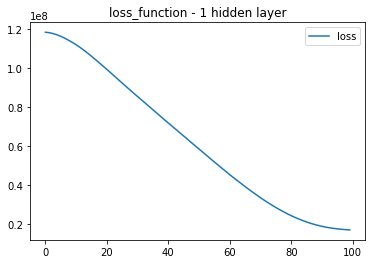

0.8513774321576335
0.8526185611847744


In [17]:
# define model - shallow neural net
number_hidden_nodes = 10
number_input_features = 5

nn = Sequential()
nn.add(Dense(units=number_hidden_nodes, input_dim=number_input_features, activation="relu"))
nn.add(Dense(1, activation="linear"))

nn.summary()

# compile model
nn.compile(loss="mean_squared_error", optimizer="adam", metrics=["mse"])

# train model
model_1 = nn.fit(X_train_scaled, y_train, epochs=100)

# Plot the train and test loss function
plt.plot(model_1.history["loss"])
plt.title("loss_function - 1 hidden layer")
plt.legend(["loss"])
plt.show()

y_train_pred = nn.predict(X_train_scaled)
y_test_pred = nn.predict(X_test_scaled)

print(r2_score(y_train, y_train_pred))
print(r2_score(y_test, y_test_pred))


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 15)                90        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 16        
Total params: 106
Trainable params: 106
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
29840/29840 [==============================] - 1s 29us/sample - loss: 118361881.5645 - mean_squared_error: 118361872.0000
Epoch 2/100
29840/29840 [==============================] - 1s 29us/sample - loss: 117968019.9365 - mean_squared_error: 117968032.0000
Epoch 3/100
29840/29840 [==============================] - 1s 29us/sample - loss: 117258438.4950 - mean_squared_error: 117258464.0000
Epoch 4/100
29840/29840 [==============================] - 1s 29us/sample - loss: 116321877.1587 - mean_squared_erro

29840/29840 [==============================] - 1s 29us/sample - loss: 28194882.4193 - mean_squared_error: 28194908.0000
Epoch 58/100
29840/29840 [==============================] - 1s 27us/sample - loss: 27040201.0693 - mean_squared_error: 27040200.0000
Epoch 59/100
29840/29840 [==============================] - 1s 30us/sample - loss: 25941719.4809 - mean_squared_error: 25941716.0000
Epoch 60/100
29840/29840 [==============================] - 1s 29us/sample - loss: 24920245.0127 - mean_squared_error: 24920226.0000
Epoch 61/100
29840/29840 [==============================] - 1s 28us/sample - loss: 23964344.9660 - mean_squared_error: 23964336.0000
Epoch 62/100
29840/29840 [==============================] - 1s 28us/sample - loss: 23075907.6633 - mean_squared_error: 23075900.0000
Epoch 63/100
29840/29840 [==============================] - 1s 27us/sample - loss: 22268611.8834 - mean_squared_error: 22268606.0000
Epoch 64/100
29840/29840 [==============================] - 1s 30us/sample - loss:

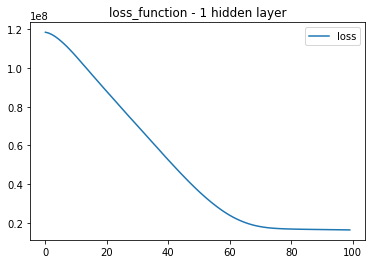

0.8552660445282417
0.8579941710864538


In [18]:
# define model - shallow neural net with 3X
number_hidden_nodes = 15
number_input_features = 5

nn = Sequential()
nn.add(Dense(units=number_hidden_nodes, input_dim=number_input_features, activation="relu"))
nn.add(Dense(1, activation="linear"))

nn.summary()

# compile model
nn.compile(loss="mean_squared_error", optimizer="adam", metrics=["mse"])

# train model
model_1 = nn.fit(X_train_scaled, y_train, epochs=100)

# Plot the train and test loss function
plt.plot(model_1.history["loss"])
plt.title("loss_function - 1 hidden layer")
plt.legend(["loss"])
plt.show()

y_train_pred = nn.predict(X_train_scaled)
y_test_pred = nn.predict(X_test_scaled)

print(r2_score(y_train, y_train_pred))
print(r2_score(y_test, y_test_pred))

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 20)                120       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 21        
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
29840/29840 [==============================] - 1s 30us/sample - loss: 118356593.1261 - mean_squared_error: 118356552.0000
Epoch 2/100
29840/29840 [==============================] - 1s 30us/sample - loss: 117810524.0575 - mean_squared_error: 117810640.0000
Epoch 3/100
29840/29840 [==============================] - 1s 27us/sample - loss: 116785919.6815 - mean_squared_error: 116785888.0000
Epoch 4/100
29840/29840 [==============================] - 1s 32us/sample - loss: 115386175.9764 - mean_squared_erro

29840/29840 [==============================] - 1s 26us/sample - loss: 20210033.5917 - mean_squared_error: 20210032.0000
Epoch 58/100
29840/29840 [==============================] - 1s 25us/sample - loss: 19580016.1505 - mean_squared_error: 19580016.0000
Epoch 59/100
29840/29840 [==============================] - 1s 27us/sample - loss: 19043936.1992 - mean_squared_error: 19043936.0000
Epoch 60/100
29840/29840 [==============================] - 1s 28us/sample - loss: 18606272.3974 - mean_squared_error: 18606280.0000
Epoch 61/100
29840/29840 [==============================] - 1s 28us/sample - loss: 18252010.2840 - mean_squared_error: 18252018.0000
Epoch 62/100
29840/29840 [==============================] - 1s 28us/sample - loss: 17967011.2834 - mean_squared_error: 17967020.0000
Epoch 63/100
29840/29840 [==============================] - 1s 32us/sample - loss: 17742010.6698 - mean_squared_error: 17742006.0000
Epoch 64/100
29840/29840 [==============================] - 1s 33us/sample - loss:

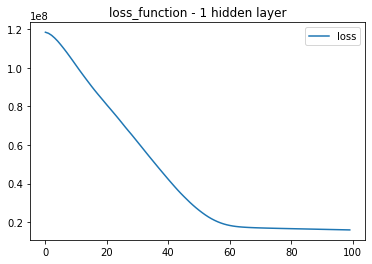

0.8598297061042384
0.8677608235891869


In [19]:
# conclusion: did not add value
# define model - shallow neural net with 4X
number_hidden_nodes = 20
number_input_features = 5

nn = Sequential()
nn.add(Dense(units=number_hidden_nodes, input_dim=number_input_features, activation="relu"))
nn.add(Dense(1, activation="linear"))

nn.summary()

# compile model
nn.compile(loss="mean_squared_error", optimizer="adam", metrics=["mse"])

# train model
model_1 = nn.fit(X_train_scaled, y_train, epochs=100)

# Plot the train and test loss function
plt.plot(model_1.history["loss"])
plt.title("loss_function - 1 hidden layer")
plt.legend(["loss"])
plt.show()

y_train_pred = nn.predict(X_train_scaled)
y_test_pred = nn.predict(X_test_scaled)

print(r2_score(y_train, y_train_pred))
print(r2_score(y_test, y_test_pred))

## Deep Neural Network

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 10)                60        
_________________________________________________________________
dense_7 (Dense)              (None, 5)                 55        
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 6         
Total params: 121
Trainable params: 121
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
29840/29840 [==============================] - 1s 39us/sample - loss: 118399140.6879 - mean_squared_error: 118399208.0000
Epoch 2/100
29840/29840 [==============================] - 1s 37us/sample - loss: 117697302.8593 - mean_squared_error: 117697392.0000
Epoch 3/100
29840/29840 [==============================] - 1s 48us/sample - loss: 115365064.2855 - mean_squared_error:

Epoch 57/100
29840/29840 [==============================] - 1s 27us/sample - loss: 13155125.2456 - mean_squared_error: 13155136.0000
Epoch 58/100
29840/29840 [==============================] - 1s 26us/sample - loss: 13085906.6205 - mean_squared_error: 13085910.0000
Epoch 59/100
29840/29840 [==============================] - 1s 28us/sample - loss: 13036260.2020 - mean_squared_error: 13036256.0000
Epoch 60/100
29840/29840 [==============================] - 1s 31us/sample - loss: 12982034.5683 - mean_squared_error: 12982039.0000
Epoch 61/100
29840/29840 [==============================] - 1s 28us/sample - loss: 12933038.7780 - mean_squared_error: 12933040.0000
Epoch 62/100
29840/29840 [==============================] - 1s 28us/sample - loss: 12887267.1620 - mean_squared_error: 12887266.0000
Epoch 63/100
29840/29840 [==============================] - 1s 27us/sample - loss: 12845784.2196 - mean_squared_error: 12845791.0000
Epoch 64/100
29840/29840 [==============================] - 1s 32us/s

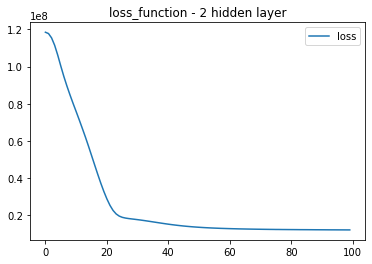

0.8923940236051628
0.8976107542467131


In [20]:
# Define the model - deep neural net
number_input_features = 5
hidden_nodes_layer1 = 10
hidden_nodes_layer2 = 5

nn = Sequential()
# First hidden layer
nn.add(
    Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)
# Second hidden layer
nn.add(Dense(units=hidden_nodes_layer2, activation="relu"))
# Output layer
nn.add(Dense(units=1, activation="linear"))


nn.summary()

# compile model
nn.compile(loss="mean_squared_error", optimizer="adam", metrics=["mse"])

# train model
model_1 = nn.fit(X_train_scaled, y_train, epochs=100)

# Plot the train and test loss function
plt.plot(model_1.history["loss"])
plt.title("loss_function - 2 hidden layer")
plt.legend(["loss"])
plt.show()

y_train_pred = nn.predict(X_train_scaled)
y_test_pred = nn.predict(X_test_scaled)

print(r2_score(y_train, y_train_pred))
print(r2_score(y_test, y_test_pred))
# print(accuracy_score(y_test, y_pred))

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 15)                90        
_________________________________________________________________
dense_10 (Dense)             (None, 5)                 80        
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 6         
Total params: 176
Trainable params: 176
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
29840/29840 [==============================] - 1s 35us/sample - loss: 118204549.7134 - mean_squared_error: 118204464.0000
Epoch 2/100
29840/29840 [==============================] - 1s 31us/sample - loss: 115605436.5888 - mean_squared_error: 115605472.0000
Epoch 3/100
29840/29840 [==============================] - 1s 29us/sample - loss: 109543091.0859 - mean_squared_error:

29840/29840 [==============================] - 1s 42us/sample - loss: 13362868.7770 - mean_squared_error: 13362864.0000
Epoch 57/100
29840/29840 [==============================] - 1s 31us/sample - loss: 13293120.7837 - mean_squared_error: 13293124.0000
Epoch 58/100
29840/29840 [==============================] - 1s 27us/sample - loss: 13227472.0249 - mean_squared_error: 13227477.0000
Epoch 59/100
29840/29840 [==============================] - 1s 32us/sample - loss: 13156398.1980 - mean_squared_error: 13156393.0000
Epoch 60/100
29840/29840 [==============================] - 1s 33us/sample - loss: 13093670.4976 - mean_squared_error: 13093685.0000
Epoch 61/100
29840/29840 [==============================] - 1s 32us/sample - loss: 13027887.1165 - mean_squared_error: 13027883.0000
Epoch 62/100
29840/29840 [==============================] - 1s 29us/sample - loss: 12973055.8809 - mean_squared_error: 12973051.0000
Epoch 63/100
29840/29840 [==============================] - 1s 28us/sample - loss:

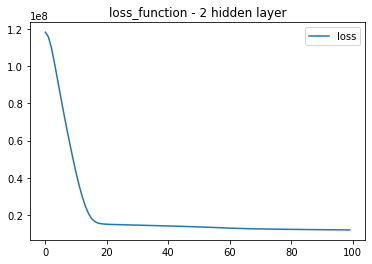

0.8941205085431854
0.9010855166131615


In [21]:
# Define the model - deep neural net 3X
number_input_features = 5
hidden_nodes_layer1 = 15
hidden_nodes_layer2 = 5
epochs=1000
nn = Sequential()
# First hidden layer
nn.add(
    Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)
# Second hidden layer
nn.add(Dense(units=hidden_nodes_layer2, activation="relu"))
# Output layer
nn.add(Dense(units=1, activation="linear"))


nn.summary()

# compile model
nn.compile(loss="mean_squared_error", optimizer="adam", metrics=["mse"])

# train model
model_1 = nn.fit(X_train_scaled, y_train, epochs=epochs)

# Plot the train and test loss function
plt.plot(model_1.history["loss"])
plt.title("loss_function - 2 hidden layer")
plt.legend(["loss"])
plt.show()

y_train_pred = nn.predict(X_train_scaled)
y_test_pred = nn.predict(X_test_scaled)

print(r2_score(y_train, y_train_pred))
print(r2_score(y_test, y_test_pred))

### Deep Neural Network with three hidden layers

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 15)                90        
_________________________________________________________________
dense_13 (Dense)             (None, 5)                 80        
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 6         
Total params: 176
Trainable params: 176
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
29840/29840 [==============================] - 1s 35us/sample - loss: 118087893.1694 - mean_squared_error: 118087864.0000
Epoch 2/100
29840/29840 [==============================] - 1s 30us/sample - loss: 113292660.6722 - mean_squared_error: 113292600.0000
Epoch 3/100
29840/29840 [==============================] - 1s 29us/sample - loss: 102881723.9267 - mean_squared_error:

29840/29840 [==============================] - 1s 40us/sample - loss: 12711133.0426 - mean_squared_error: 12711132.0000
Epoch 57/100
29840/29840 [==============================] - 1s 30us/sample - loss: 12659505.0576 - mean_squared_error: 12659495.0000
Epoch 58/100
29840/29840 [==============================] - 1s 29us/sample - loss: 12626165.0825 - mean_squared_error: 12626178.0000
Epoch 59/100
29840/29840 [==============================] - 1s 32us/sample - loss: 12596021.5494 - mean_squared_error: 12596010.0000
Epoch 60/100
29840/29840 [==============================] - 1s 31us/sample - loss: 12553515.4319 - mean_squared_error: 12553516.0000
Epoch 61/100
29840/29840 [==============================] - 1s 31us/sample - loss: 12531663.2199 - mean_squared_error: 12531669.0000
Epoch 62/100
29840/29840 [==============================] - 1s 29us/sample - loss: 12496715.3072 - mean_squared_error: 12496725.0000
Epoch 63/100
29840/29840 [==============================] - 1s 29us/sample - loss:

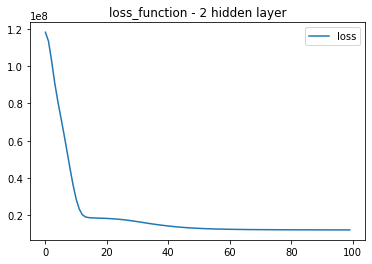

0.8929262046683367
0.8985106049719219


In [22]:
# Define the model - deep neural net 3X
number_input_features = 5
hidden_nodes_layer1 = 15
hidden_nodes_layer2 = 5

nn = Sequential()
# First hidden layer
nn.add(
    Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)
# Second hidden layer
nn.add(Dense(units=hidden_nodes_layer2, activation="relu"))
# Output layer
nn.add(Dense(units=1, activation="linear"))


nn.summary()

# compile model
nn.compile(loss="mean_squared_error", optimizer="adam", metrics=["mse"])

# train model
model_1 = nn.fit(X_train_scaled, y_train, epochs=100)

# Plot the train and test loss function
plt.plot(model_1.history["loss"])
plt.title("loss_function - 2 hidden layer")
plt.legend(["loss"])
plt.show()

y_train_pred = nn.predict(X_train_scaled)
y_test_pred = nn.predict(X_test_scaled)

print(r2_score(y_train, y_train_pred))
print(r2_score(y_test, y_test_pred))

## Predicting Number of Cases- with NN Model

In [23]:
# Check to make sure dtypes are appropriate .
df_cases_ml.dtypes

population                        float64
population_density                float64
median_age                        float64
ContainmentHealthIndex_updated    float64
StringencyIndex_updated           float64
total_cases_updated               float64
dtype: object

In [24]:
# Check shape before dropping na
df_cases_ml.shape

(34927, 6)

In [25]:
# Drop rows with null values
df_cases_ml=df_death_ml.dropna(how='any')
df_cases_ml.shape

(31411, 6)

In [26]:
# create features(X) and target(y) sets
X = df_cases_ml.drop(['total_cases_updated'],axis=1).values

y = df_cases_ml['total_cases_updated'].values
y = y.reshape(-1,1)

In [27]:
# Check shape for num of features
X.shape

(31411, 5)

In [28]:
# Split dataset into training and testing 
# train 90% of data, test 10%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10)

# scale data
X_scaler = StandardScaler()
X_scaler.fit(X_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_19 (Dense)             (None, 10)                60        
_________________________________________________________________
dense_20 (Dense)             (None, 1)                 11        
Total params: 71
Trainable params: 71
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
28269/28269 [==============================] - 1s 28us/sample - loss: 77001597573.8818 - mean_squared_error: 77001596928.0000
Epoch 2/1000
28269/28269 [==============================] - 1s 26us/sample - loss: 76996132644.4543 - mean_squared_error: 76996132864.0000
Epoch 3/1000
28269/28269 [==============================] - 1s 26us/sample - loss: 76986142039.2622 - mean_squared_error: 76986187776.0000
Epoch 4/1000
28269/28269 [==============================] - 1s 40us/sample - loss: 76972617016.3003 - m

28269/28269 [==============================] - 1s 27us/sample - loss: 73521971275.7658 - mean_squared_error: 73521954816.0000
Epoch 55/1000
28269/28269 [==============================] - 1s 31us/sample - loss: 73406687056.2304 - mean_squared_error: 73406676992.0000
Epoch 56/1000
28269/28269 [==============================] - 1s 35us/sample - loss: 73289344523.4375 - mean_squared_error: 73289310208.0000
Epoch 57/1000
28269/28269 [==============================] - 1s 29us/sample - loss: 73170758473.3524 - mean_squared_error: 73170780160.0000
Epoch 58/1000
28269/28269 [==============================] - 1s 31us/sample - loss: 73053889573.9893 - mean_squared_error: 73053847552.0000
Epoch 59/1000
28269/28269 [==============================] - 1s 28us/sample - loss: 72935466418.5982 - mean_squared_error: 72935456768.0000
Epoch 60/1000
28269/28269 [==============================] - 1s 26us/sample - loss: 72814396821.1590 - mean_squared_error: 72814395392.0000
Epoch 61/1000
28269/28269 [=======

28269/28269 [==============================] - 1s 20us/sample - loss: 65629910261.3594 - mean_squared_error: 65629913088.0000
Epoch 112/1000
28269/28269 [==============================] - 1s 26us/sample - loss: 65479608015.2206 - mean_squared_error: 65479573504.0000
Epoch 113/1000
28269/28269 [==============================] - 1s 25us/sample - loss: 65328284488.1344 - mean_squared_error: 65328283648.0000
Epoch 114/1000
28269/28269 [==============================] - 1s 25us/sample - loss: 65174261334.3929 - mean_squared_error: 65174249472.0000
Epoch 115/1000
28269/28269 [==============================] - 1s 26us/sample - loss: 65020895804.8553 - mean_squared_error: 65020928000.0000s - loss: 70232683712.0000 - mean_squared_err
Epoch 116/1000
28269/28269 [==============================] - 1s 25us/sample - loss: 64867402037.7374 - mean_squared_error: 64867381248.0000
Epoch 117/1000
28269/28269 [==============================] - 1s 24us/sample - loss: 64716065955.2092 - mean_squared_error: 

28269/28269 [==============================] - 1s 20us/sample - loss: 57175161333.8642 - mean_squared_error: 57175203840.0000s - loss: 36762309056.0000 - mean_squared_error: 36 - ETA: 0s - loss: 59468833074.2154 - mean_squared_error: 59468873728.
Epoch 167/1000
28269/28269 [==============================] - 1s 24us/sample - loss: 57019098287.5387 - mean_squared_error: 57019109376.0000
Epoch 168/1000
28269/28269 [==============================] - 1s 24us/sample - loss: 56861452572.0301 - mean_squared_error: 56861450240.0000
Epoch 169/1000
28269/28269 [==============================] - 1s 20us/sample - loss: 56706186586.3322 - mean_squared_error: 56706195456.0000
Epoch 170/1000
28269/28269 [==============================] - 1s 20us/sample - loss: 56549165042.7241 - mean_squared_error: 56549134336.0000
Epoch 171/1000
28269/28269 [==============================] - 1s 19us/sample - loss: 56392683248.5507 - mean_squared_error: 56392695808.0000
Epoch 172/1000
28269/28269 [====================

28269/28269 [==============================] - 1s 20us/sample - loss: 49023296345.2998 - mean_squared_error: 49023307776.0000
Epoch 219/1000
28269/28269 [==============================] - 1s 31us/sample - loss: 48865751637.4692 - mean_squared_error: 48865755136.0000
Epoch 220/1000
28269/28269 [==============================] - 1s 26us/sample - loss: 48710757002.1743 - mean_squared_error: 48710778880.0000
Epoch 221/1000
28269/28269 [==============================] - 1s 24us/sample - loss: 48553595050.4176 - mean_squared_error: 48553590784.0000
Epoch 222/1000
28269/28269 [==============================] - 1s 19us/sample - loss: 48395642815.1238 - mean_squared_error: 48395649024.0000
Epoch 223/1000
28269/28269 [==============================] - 1s 19us/sample - loss: 48237517245.7926 - mean_squared_error: 48237527040.0000s - loss: 47173132579.5494 - mean_squared_error: 47173144
Epoch 224/1000
28269/28269 [==============================] - 1s 22us/sample - loss: 48079993865.8165 - mean_squ

28269/28269 [==============================] - 1s 20us/sample - loss: 40753415918.7169 - mean_squared_error: 40753405952.0000
Epoch 272/1000
28269/28269 [==============================] - 1s 22us/sample - loss: 40599242375.4892 - mean_squared_error: 40599240704.0000
Epoch 273/1000
28269/28269 [==============================] - 1s 24us/sample - loss: 40445661556.0372 - mean_squared_error: 40445636608.0000
Epoch 274/1000
28269/28269 [==============================] - 1s 21us/sample - loss: 40292906544.0232 - mean_squared_error: 40292925440.0000
Epoch 275/1000
28269/28269 [==============================] - 1s 22us/sample - loss: 40142316420.7679 - mean_squared_error: 40142319616.0000
Epoch 276/1000
28269/28269 [==============================] - 1s 20us/sample - loss: 39990411971.4435 - mean_squared_error: 39990415360.0000
Epoch 277/1000
28269/28269 [==============================] - 1s 24us/sample - loss: 39835895579.8015 - mean_squared_error: 39835885568.0000
Epoch 278/1000
28269/28269 [

28269/28269 [==============================] - 1s 23us/sample - loss: 33206557075.8550 - mean_squared_error: 33206566912.0000s - loss: 35126389125.8744 - mean_squared_error
Epoch 324/1000
28269/28269 [==============================] - 1s 20us/sample - loss: 33071353707.3877 - mean_squared_error: 33071374336.0000
Epoch 325/1000
28269/28269 [==============================] - 1s 19us/sample - loss: 32935477469.3398 - mean_squared_error: 32935491584.0000
Epoch 326/1000
28269/28269 [==============================] - 1s 30us/sample - loss: 32800192227.7186 - mean_squared_error: 32800194560.0000
Epoch 327/1000
28269/28269 [==============================] - 1s 20us/sample - loss: 32663763155.7803 - mean_squared_error: 32663752704.0000
Epoch 328/1000
28269/28269 [==============================] - 1s 24us/sample - loss: 32529821667.9631 - mean_squared_error: 32529815552.0000
Epoch 329/1000
28269/28269 [==============================] - 1s 19us/sample - loss: 32398049814.9906 - mean_squared_error

28269/28269 [==============================] - 1s 28us/sample - loss: 26504126360.0750 - mean_squared_error: 26504128512.0000
Epoch 378/1000
28269/28269 [==============================] - 1s 21us/sample - loss: 26394317606.5870 - mean_squared_error: 26394320896.0000
Epoch 379/1000
28269/28269 [==============================] - 1s 21us/sample - loss: 26286719389.9947 - mean_squared_error: 26286727168.0000
Epoch 380/1000
28269/28269 [==============================] - 1s 20us/sample - loss: 26177154738.7037 - mean_squared_error: 26177159168.0000
Epoch 381/1000
28269/28269 [==============================] - 1s 24us/sample - loss: 26067263433.2619 - mean_squared_error: 26067271680.0000
Epoch 382/1000
28269/28269 [==============================] - 1s 21us/sample - loss: 25957796678.4998 - mean_squared_error: 25957810176.0000
Epoch 383/1000
28269/28269 [==============================] - 1s 27us/sample - loss: 25850677180.6244 - mean_squared_error: 25850697728.0000
Epoch 384/1000
28269/28269 [

28269/28269 [==============================] - 1s 24us/sample - loss: 21317519316.4413 - mean_squared_error: 21317517312.0000
Epoch 432/1000
28269/28269 [==============================] - 1s 24us/sample - loss: 21238583240.8227 - mean_squared_error: 21238575104.0000
Epoch 433/1000
28269/28269 [==============================] - 1s 27us/sample - loss: 21160634786.0472 - mean_squared_error: 21160613888.0000
Epoch 434/1000
28269/28269 [==============================] - 1s 22us/sample - loss: 21082802334.8035 - mean_squared_error: 21082808320.0000s - loss: 21256939623.7431 - mean_squared_error: 21256947712.00
Epoch 435/1000
28269/28269 [==============================] - 1s 23us/sample - loss: 21005870732.9974 - mean_squared_error: 21005883392.0000
Epoch 436/1000
28269/28269 [==============================] - 1s 20us/sample - loss: 20929701644.7147 - mean_squared_error: 20929697792.0000s - loss: 30985864877.0120 - mean_squared_error
Epoch 437/1000
28269/28269 [==============================]

28269/28269 [==============================] - 1s 23us/sample - loss: 17754817838.7146 - mean_squared_error: 17754816512.0000
Epoch 486/1000
28269/28269 [==============================] - 1s 20us/sample - loss: 17702749705.2551 - mean_squared_error: 17702750208.0000
Epoch 487/1000
28269/28269 [==============================] - 1s 23us/sample - loss: 17651858184.5182 - mean_squared_error: 17651845120.0000
Epoch 488/1000
28269/28269 [==============================] - 1s 23us/sample - loss: 17599552144.6616 - mean_squared_error: 17599565824.0000
Epoch 489/1000
28269/28269 [==============================] - 1s 19us/sample - loss: 17548530239.3785 - mean_squared_error: 17548529664.0000
Epoch 490/1000
28269/28269 [==============================] - 1s 23us/sample - loss: 17497890285.2544 - mean_squared_error: 17497886720.0000
Epoch 491/1000
28269/28269 [==============================] - 1s 20us/sample - loss: 17448274619.3657 - mean_squared_error: 17448265728.0000
Epoch 492/1000
28269/28269 [

28269/28269 [==============================] - 1s 32us/sample - loss: 15546496226.5956 - mean_squared_error: 15546493952.0000
Epoch 543/1000
28269/28269 [==============================] - 1s 24us/sample - loss: 15519100751.6463 - mean_squared_error: 15519094784.0000
Epoch 544/1000
28269/28269 [==============================] - 1s 26us/sample - loss: 15492442259.3750 - mean_squared_error: 15492440064.0000
Epoch 545/1000
28269/28269 [==============================] - 1s 31us/sample - loss: 15465846019.2977 - mean_squared_error: 15465842688.0000
Epoch 546/1000
28269/28269 [==============================] - 1s 24us/sample - loss: 15439201206.0770 - mean_squared_error: 15439205376.0000
Epoch 547/1000
28269/28269 [==============================] - ETA: 0s - loss: 15723986683.3761 - mean_squared_error: 15723992064.00 - 1s 23us/sample - loss: 15412655424.7941 - mean_squared_error: 15412661248.0000
Epoch 548/1000
28269/28269 [==============================] - 1s 23us/sample - loss: 15387217233.

28269/28269 [==============================] - 1s 19us/sample - loss: 14465859038.6563 - mean_squared_error: 14465855488.0000s - loss: 14647874452.2927 - mean_squared_error: 
Epoch 597/1000
28269/28269 [==============================] - 1s 19us/sample - loss: 14451203039.5076 - mean_squared_error: 14451201024.0000
Epoch 598/1000
28269/28269 [==============================] - ETA: 0s - loss: 14310632007.2885 - mean_squared_error: 14310625280.0000TA: 0s - loss: 14907802859.4286 - mean_squared_error: 14 - ETA: 0s - loss: 14418335278.6087 - mean_squared_error: 1441833164 - 1s 19us/sample - loss: 14436936316.1558 - mean_squared_error: 14436927488.0000
Epoch 599/1000
28269/28269 [==============================] - 1s 24us/sample - loss: 14422883599.2048 - mean_squared_error: 14422886400.0000s - loss: 15134347038.6901 - mean_squared
Epoch 600/1000
28269/28269 [==============================] - 1s 22us/sample - loss: 14409545210.5031 - mean_squared_error: 14409542656.0000
Epoch 601/1000
28269/2

Epoch 650/1000
28269/28269 [==============================] - 1s 20us/sample - loss: 13856912074.8874 - mean_squared_error: 13856908288.0000
Epoch 651/1000
28269/28269 [==============================] - 1s 21us/sample - loss: 13848061069.7208 - mean_squared_error: 13848067072.0000
Epoch 652/1000
28269/28269 [==============================] - 1s 22us/sample - loss: 13839150716.0290 - mean_squared_error: 13839141888.0000
Epoch 653/1000
28269/28269 [==============================] - 1s 20us/sample - loss: 13830585903.3514 - mean_squared_error: 13830581248.0000
Epoch 654/1000
28269/28269 [==============================] - 1s 24us/sample - loss: 13821943294.0032 - mean_squared_error: 13821941760.0000s - loss: 13316323978.1647 - mean_squared_error
Epoch 655/1000
28269/28269 [==============================] - 1s 23us/sample - loss: 13813482318.2154 - mean_squared_error: 13813478400.0000
Epoch 656/1000
28269/28269 [==============================] - 1s 23us/sample - loss: 13805143498.3214 - mea

Epoch 704/1000
28269/28269 [==============================] - 1s 19us/sample - loss: 13463749012.6507 - mean_squared_error: 13463747584.0000
Epoch 705/1000
28269/28269 [==============================] - 1s 23us/sample - loss: 13457334990.6184 - mean_squared_error: 13457335296.0000
Epoch 706/1000
28269/28269 [==============================] - 1s 19us/sample - loss: 13451034588.8005 - mean_squared_error: 13451026432.0000
Epoch 707/1000
28269/28269 [==============================] - 1s 26us/sample - loss: 13444910689.1693 - mean_squared_error: 13444899840.0000
Epoch 708/1000
28269/28269 [==============================] - 1s 25us/sample - loss: 13438689369.4402 - mean_squared_error: 13438692352.0000
Epoch 709/1000
28269/28269 [==============================] - 1s 27us/sample - loss: 13432590877.9647 - mean_squared_error: 13432585216.0000
Epoch 710/1000
28269/28269 [==============================] - 1s 24us/sample - loss: 13426551114.1403 - mean_squared_error: 13426548736.0000
Epoch 711/100

28269/28269 [==============================] - 1s 34us/sample - loss: 13124086068.9858 - mean_squared_error: 13124086784.0000
Epoch 762/1000
28269/28269 [==============================] - 1s 28us/sample - loss: 13118147439.5336 - mean_squared_error: 13118147584.0000
Epoch 763/1000
28269/28269 [==============================] - 1s 20us/sample - loss: 13112245285.9440 - mean_squared_error: 13112255488.0000
Epoch 764/1000
28269/28269 [==============================] - 1s 19us/sample - loss: 13106345072.4375 - mean_squared_error: 13106340864.0000
Epoch 765/1000
28269/28269 [==============================] - 1s 23us/sample - loss: 13100409038.3965 - mean_squared_error: 13100408832.0000
Epoch 766/1000
28269/28269 [==============================] - 1s 20us/sample - loss: 13094523807.8449 - mean_squared_error: 13094511616.0000
Epoch 767/1000
28269/28269 [==============================] - 1s 25us/sample - loss: 13088699910.3804 - mean_squared_error: 13088707584.0000
Epoch 768/1000
28269/28269 [

28269/28269 [==============================] - 1s 27us/sample - loss: 12752485394.4921 - mean_squared_error: 12752477184.0000
Epoch 818/1000
28269/28269 [==============================] - 1s 22us/sample - loss: 12745879861.5201 - mean_squared_error: 12745893888.0000
Epoch 819/1000
28269/28269 [==============================] - 1s 22us/sample - loss: 12739583082.5512 - mean_squared_error: 12739585024.0000s - loss: 14023188863.8084 - mean_squared_e
Epoch 820/1000
28269/28269 [==============================] - 1s 26us/sample - loss: 12733133880.4768 - mean_squared_error: 12733130752.0000
Epoch 821/1000
28269/28269 [==============================] - 1s 23us/sample - loss: 12726704339.1690 - mean_squared_error: 12726699008.0000
Epoch 822/1000
28269/28269 [==============================] - 1s 28us/sample - loss: 12720536816.4511 - mean_squared_error: 12720539648.0000
Epoch 823/1000
28269/28269 [==============================] - 1s 23us/sample - loss: 12713914816.5003 - mean_squared_error: 12

28269/28269 [==============================] - 1s 21us/sample - loss: 12566198690.7428 - mean_squared_error: 12566200320.0000
Epoch 873/1000
28269/28269 [==============================] - 1s 23us/sample - loss: 12565480254.8567 - mean_squared_error: 12565480448.0000
Epoch 874/1000
28269/28269 [==============================] - 1s 20us/sample - loss: 12564642608.4036 - mean_squared_error: 12564641792.0000
Epoch 875/1000
28269/28269 [==============================] - 1s 19us/sample - loss: 12563543527.6035 - mean_squared_error: 12563548160.0000
Epoch 876/1000
28269/28269 [==============================] - 1s 21us/sample - loss: 12562659660.7801 - mean_squared_error: 12562663424.0000
Epoch 877/1000
28269/28269 [==============================] - 1s 24us/sample - loss: 12561805731.1956 - mean_squared_error: 12561799168.0000
Epoch 878/1000
28269/28269 [==============================] - 1s 20us/sample - loss: 12561011578.7793 - mean_squared_error: 12561007616.0000
Epoch 879/1000
28269/28269 [

28269/28269 [==============================] - 1s 24us/sample - loss: 12534224816.3447 - mean_squared_error: 12534226944.0000
Epoch 929/1000
28269/28269 [==============================] - 1s 20us/sample - loss: 12533777214.7435 - mean_squared_error: 12533774336.0000
Epoch 930/1000
28269/28269 [==============================] - 1s 24us/sample - loss: 12533487907.2726 - mean_squared_error: 12533480448.0000
Epoch 931/1000
28269/28269 [==============================] - 1s 24us/sample - loss: 12533078168.6002 - mean_squared_error: 12533071872.0000
Epoch 932/1000
28269/28269 [==============================] - 1s 25us/sample - loss: 12532482702.1951 - mean_squared_error: 12532484096.0000
Epoch 933/1000
28269/28269 [==============================] - ETA: 0s - loss: 12509388344.1140 - mean_squared_error: 12509386752.0000 ETA: 0s - loss: 12911795591.0898 - mean_squ - 1s 28us/sample - loss: 12532240605.3568 - mean_squared_error: 12532241408.0000
Epoch 934/1000
28269/28269 [=======================

28269/28269 [==============================] - 1s 26us/sample - loss: 12513194851.7389 - mean_squared_error: 12513200128.0000
Epoch 985/1000
28269/28269 [==============================] - 1s 27us/sample - loss: 12512789901.4072 - mean_squared_error: 12512799744.0000
Epoch 986/1000
28269/28269 [==============================] - 1s 24us/sample - loss: 12512574602.3735 - mean_squared_error: 12512576512.0000
Epoch 987/1000
28269/28269 [==============================] - 1s 21us/sample - loss: 12512182362.6186 - mean_squared_error: 12512188416.0000
Epoch 988/1000
28269/28269 [==============================] - 1s 23us/sample - loss: 12511768086.8072 - mean_squared_error: 12511768576.0000
Epoch 989/1000
28269/28269 [==============================] - 1s 23us/sample - loss: 12511321181.6738 - mean_squared_error: 12511322112.0000
Epoch 990/1000
28269/28269 [==============================] - 1s 24us/sample - loss: 12511113237.0096 - mean_squared_error: 12511106048.0000
Epoch 991/1000
28269/28269 [

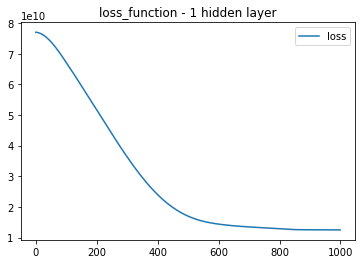

0.8324891857540911
0.8425266280546374


In [31]:
# define model - shallow neural net
number_hidden_nodes = 10
number_input_features = 5
epochs=100
nn = Sequential()
nn.add(Dense(units=number_hidden_nodes, input_dim=number_input_features, activation="relu"))
nn.add(Dense(1, activation="linear"))

nn.summary()

# compile model
nn.compile(loss="mean_squared_error", optimizer="adam", metrics=["mse"])

# train model
model_1 = nn.fit(X_train_scaled, y_train, epochs=epochs )

# Plot the train and test loss function
plt.plot(model_1.history["loss"])
plt.title("loss_function - 1 hidden layer")
plt.legend(["loss"])
plt.show()

y_train_pred = nn.predict(X_train_scaled)
y_test_pred = nn.predict(X_test_scaled)

print(r2_score(y_train, y_train_pred))
print(r2_score(y_test, y_test_pred))

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_17 (Dense)             (None, 15)                90        
_________________________________________________________________
dense_18 (Dense)             (None, 1)                 16        
Total params: 106
Trainable params: 106
Non-trainable params: 0
_________________________________________________________________
Epoch 1/500
28269/28269 [==============================] - 1s 40us/sample - loss: 77001754517.8982 - mean_squared_error: 77001809920.0000
Epoch 2/500
28269/28269 [==============================] - 1s 29us/sample - loss: 76996035665.8491 - mean_squared_error: 76996059136.0000
Epoch 3/500
28269/28269 [==============================] - 1s 28us/sample - loss: 76986060710.7636 - mean_squared_error: 76986032128.0000
Epoch 4/500
28269/28269 [==============================] - 1s 32us/sample - loss: 76972654779.0968 - mea

28269/28269 [==============================] - 1s 29us/sample - loss: 73003072439.4354 - mean_squared_error: 73003081728.0000
Epoch 55/500
28269/28269 [==============================] - 1s 28us/sample - loss: 72870888107.7805 - mean_squared_error: 72870912000.0000
Epoch 56/500
28269/28269 [==============================] - 1s 29us/sample - loss: 72735880029.7643 - mean_squared_error: 72735907840.0000
Epoch 57/500
28269/28269 [==============================] - 1s 32us/sample - loss: 72597612698.5291 - mean_squared_error: 72597626880.0000
Epoch 58/500
28269/28269 [==============================] - 1s 43us/sample - loss: 72458892042.9440 - mean_squared_error: 72458887168.0000
Epoch 59/500
28269/28269 [==============================] - 2s 59us/sample - loss: 72321299463.0364 - mean_squared_error: 72321286144.0000
Epoch 60/500
28269/28269 [==============================] - 2s 76us/sample - loss: 72182611689.1974 - mean_squared_error: 72182595584.0000
Epoch 61/500
28269/28269 [==============

28269/28269 [==============================] - 1s 25us/sample - loss: 63760555115.7602 - mean_squared_error: 63760527360.0000
Epoch 113/500
28269/28269 [==============================] - 1s 26us/sample - loss: 63589882219.9820 - mean_squared_error: 63589879808.0000
Epoch 114/500
28269/28269 [==============================] - 1s 29us/sample - loss: 63415396396.6499 - mean_squared_error: 63415422976.0000
Epoch 115/500
28269/28269 [==============================] - 1s 27us/sample - loss: 63243029515.1930 - mean_squared_error: 63242993664.0000
Epoch 116/500
28269/28269 [==============================] - 1s 26us/sample - loss: 63068670904.2957 - mean_squared_error: 63068659712.0000
Epoch 117/500
28269/28269 [==============================] - 1s 29us/sample - loss: 62892696054.3827 - mean_squared_error: 62892744704.0000
Epoch 118/500
28269/28269 [==============================] - 1s 31us/sample - loss: 62717169673.4860 - mean_squared_error: 62717145088.0000
Epoch 119/500
28269/28269 [=======

28269/28269 [==============================] - 1s 29us/sample - loss: 53376586568.9178 - mean_squared_error: 53376626688.0000
Epoch 171/500
28269/28269 [==============================] - 1s 26us/sample - loss: 53193998643.8176 - mean_squared_error: 53194010624.0000
Epoch 172/500
28269/28269 [==============================] - 1s 27us/sample - loss: 53010050617.0338 - mean_squared_error: 53010034688.0000
Epoch 173/500
28269/28269 [==============================] - 1s 34us/sample - loss: 52824200674.4734 - mean_squared_error: 52824178688.0000
Epoch 174/500
28269/28269 [==============================] - 1s 28us/sample - loss: 52641024043.1783 - mean_squared_error: 52641038336.0000
Epoch 175/500
28269/28269 [==============================] - 1s 29us/sample - loss: 52454927829.5371 - mean_squared_error: 52454948864.0000
Epoch 176/500
28269/28269 [==============================] - 1s 28us/sample - loss: 52272446928.4205 - mean_squared_error: 52272443392.0000
Epoch 177/500
28269/28269 [=======

28269/28269 [==============================] - 1s 26us/sample - loss: 42757543486.8907 - mean_squared_error: 42757541888.0000
Epoch 229/500
28269/28269 [==============================] - 1s 26us/sample - loss: 42574557163.9186 - mean_squared_error: 42574561280.0000
Epoch 230/500
28269/28269 [==============================] - 1s 30us/sample - loss: 42393102432.1370 - mean_squared_error: 42393055232.0000
Epoch 231/500
28269/28269 [==============================] - 1s 27us/sample - loss: 42219502039.2577 - mean_squared_error: 42219503616.0000
Epoch 232/500
28269/28269 [==============================] - 1s 26us/sample - loss: 42043839823.3384 - mean_squared_error: 42043838464.0000
Epoch 233/500
28269/28269 [==============================] - 1s 24us/sample - loss: 41868713690.3231 - mean_squared_error: 41868713984.0000
Epoch 234/500
28269/28269 [==============================] - 1s 27us/sample - loss: 41689606233.7843 - mean_squared_error: 41689620480.0000
Epoch 235/500
28269/28269 [=======

28269/28269 [==============================] - 1s 26us/sample - loss: 32992204927.8325 - mean_squared_error: 32992208896.0000
Epoch 287/500
28269/28269 [==============================] - 1s 26us/sample - loss: 32834478476.9272 - mean_squared_error: 32834492416.0000
Epoch 288/500
28269/28269 [==============================] - 1s 26us/sample - loss: 32680590817.5174 - mean_squared_error: 32680597504.0000
Epoch 289/500
28269/28269 [==============================] - 1s 27us/sample - loss: 32527169460.2930 - mean_squared_error: 32527159296.0000
Epoch 290/500
28269/28269 [==============================] - 1s 26us/sample - loss: 32374635477.3469 - mean_squared_error: 32374616064.0000s - loss: 28833391936.2540 - mean_squared_error: 
Epoch 291/500
28269/28269 [==============================] - 1s 25us/sample - loss: 32223567133.9024 - mean_squared_error: 32223578112.0000
Epoch 292/500
28269/28269 [==============================] - 1s 26us/sample - loss: 32071679596.3805 - mean_squared_error: 32

Epoch 344/500
28269/28269 [==============================] - 1s 25us/sample - loss: 25134404341.0152 - mean_squared_error: 25134409728.0000
Epoch 345/500
28269/28269 [==============================] - 1s 26us/sample - loss: 25020913482.5297 - mean_squared_error: 25020907520.0000
Epoch 346/500
28269/28269 [==============================] - 1s 26us/sample - loss: 24909867256.0546 - mean_squared_error: 24909852672.0000
Epoch 347/500
28269/28269 [==============================] - 1s 26us/sample - loss: 24797540650.8206 - mean_squared_error: 24797534208.0000
Epoch 348/500
28269/28269 [==============================] - 1s 28us/sample - loss: 24684950991.0282 - mean_squared_error: 24684963840.0000
Epoch 349/500
28269/28269 [==============================] - 1s 24us/sample - loss: 24574429795.6144 - mean_squared_error: 24574423040.0000
Epoch 350/500
28269/28269 [==============================] - 1s 25us/sample - loss: 24464620172.8820 - mean_squared_error: 24464615424.0000
Epoch 351/500
28269/

28269/28269 [==============================] - 1s 25us/sample - loss: 19750548518.1161 - mean_squared_error: 19750541312.0000
Epoch 403/500
28269/28269 [==============================] - 1s 25us/sample - loss: 19678721270.3283 - mean_squared_error: 19678728192.0000
Epoch 404/500
28269/28269 [==============================] - 1s 29us/sample - loss: 19606703880.1955 - mean_squared_error: 19606718464.0000
Epoch 405/500
28269/28269 [==============================] - 1s 26us/sample - loss: 19534486387.8244 - mean_squared_error: 19534479360.0000
Epoch 406/500
28269/28269 [==============================] - 1s 27us/sample - loss: 19466293553.5718 - mean_squared_error: 19466293248.0000
Epoch 407/500
28269/28269 [==============================] - 1s 28us/sample - loss: 19397555414.1031 - mean_squared_error: 19397543936.0000
Epoch 408/500
28269/28269 [==============================] - 1s 25us/sample - loss: 19328478811.6724 - mean_squared_error: 19328475136.0000
Epoch 409/500
28269/28269 [=======

28269/28269 [==============================] - 1s 24us/sample - loss: 16699624683.9775 - mean_squared_error: 16699627520.0000
Epoch 460/500
28269/28269 [==============================] - 1s 30us/sample - loss: 16663027903.8483 - mean_squared_error: 16663021568.0000
Epoch 461/500
28269/28269 [==============================] - 1s 25us/sample - loss: 16626835581.3580 - mean_squared_error: 16626835456.0000
Epoch 462/500
28269/28269 [==============================] - 1s 26us/sample - loss: 16590745822.2579 - mean_squared_error: 16590751744.0000
Epoch 463/500
28269/28269 [==============================] - 1s 25us/sample - loss: 16554916525.4830 - mean_squared_error: 16554916864.0000
Epoch 464/500
28269/28269 [==============================] - 1s 25us/sample - loss: 16519277003.0504 - mean_squared_error: 16519278592.0000
Epoch 465/500
28269/28269 [==============================] - 1s 24us/sample - loss: 16484608143.9609 - mean_squared_error: 16484603904.0000
Epoch 466/500
28269/28269 [=======

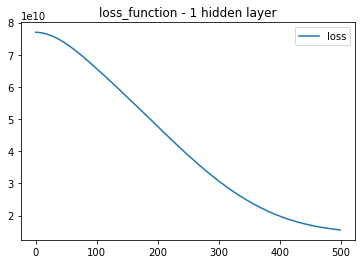

0.7920351582311709
0.7993144468715425


In [30]:
# define model - shallow neural net 3X
number_hidden_nodes = 15
number_input_features = 5
epochs=500
nn = Sequential()
nn.add(Dense(units=number_hidden_nodes, input_dim=number_input_features, activation="relu"))
nn.add(Dense(1, activation="linear"))

nn.summary()

# compile model
nn.compile(loss="mean_squared_error", optimizer="adam", metrics=["mse"])

# train model
model_1 = nn.fit(X_train_scaled, y_train, epochs=epochs )

# Plot the train and test loss function
plt.plot(model_1.history["loss"])
plt.title("loss_function - 1 hidden layer")
plt.legend(["loss"])
plt.show()

y_train_pred = nn.predict(X_train_scaled)
y_test_pred = nn.predict(X_test_scaled)

print(r2_score(y_train, y_train_pred))
print(r2_score(y_test, y_test_pred))